# COVID-19 Global Data Tracker

In [2]:
import pandas as pd
df = pd.read_csv("owid-covid-data.csv")
print("Columns in dataset:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing values per column:")
print(df.isnull().sum())

Columns in dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_p

In [3]:
import pandas as pd
df = pd.read_csv("owid-covid-data.csv")
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]
df_filtered = df_filtered.dropna(subset=['date', 'total_cases', 'total_deaths'])
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered['total_vaccinations'] = df_filtered['total_vaccinations'].fillna(0)
df_filtered['new_cases'] = df_filtered['new_cases'].fillna(0)
df_filtered['new_deaths'] = df_filtered['new_deaths'].fillna(0)
print("Filtered dataset info:")
print(df_filtered.info())
print("\nMissing values after cleaning:")
print(df_filtered.isnull().sum())
print("\nFirst 5 rows of cleaned dataset:")
print(df_filtered.head())

Filtered dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 5022 entries, 173549 to 405124
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    5022 non-null   object        
 1   continent                                   5022 non-null   object        
 2   location                                    5022 non-null   object        
 3   date                                        5022 non-null   datetime64[ns]
 4   total_cases                                 5022 non-null   float64       
 5   new_cases                                   5022 non-null   float64       
 6   new_cases_smoothed                          4565 non-null   float64       
 7   total_deaths                                5022 non-null   float64       
 8   new_deaths                                  5022 non-null   flo

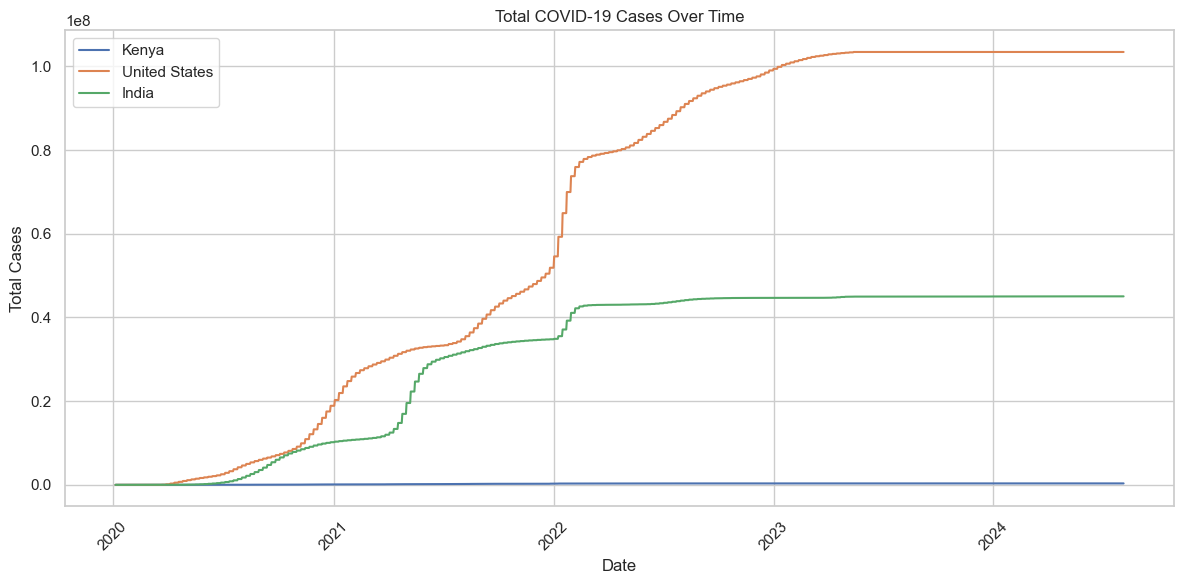

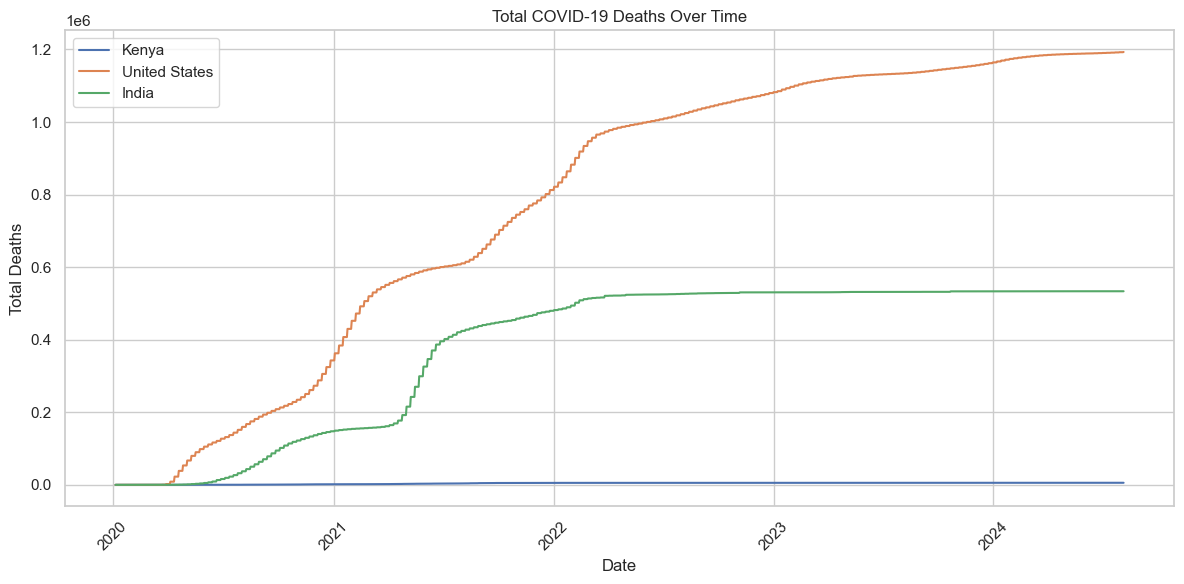

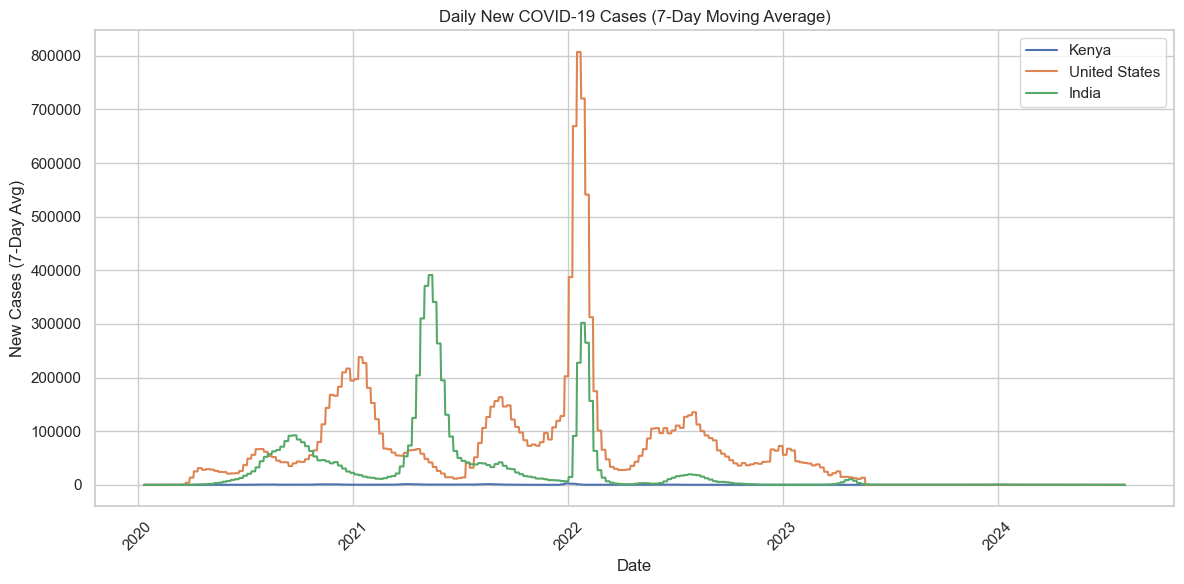


Latest Death Rate (total_deaths / total_cases):
             location  death_rate
175222          India    0.011847
196995          Kenya    0.016533
405124  United States    0.011535


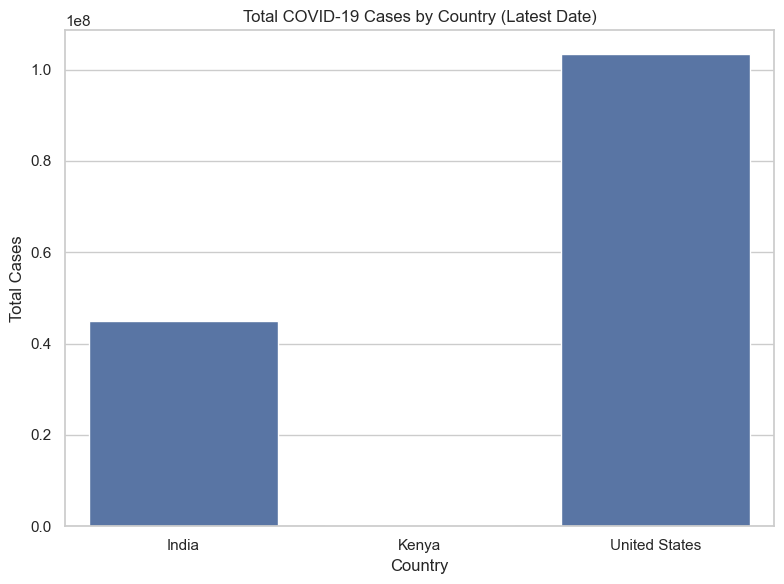

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("owid-covid-data.csv")
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]
df_filtered = df_filtered.dropna(subset=['date', 'total_cases', 'total_deaths'])
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered['total_vaccinations'] = df_filtered['total_vaccinations'].fillna(0)
df_filtered['new_cases'] = df_filtered['new_cases'].fillna(0)
df_filtered['new_deaths'] = df_filtered['new_deaths'].fillna(0)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_filtered['new_cases_ma'] = df_filtered.groupby('location')['new_cases'].transform(lambda x: x.rolling(7).mean())
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases_ma'], label=country)
plt.title('Daily New COVID-19 Cases (7-Day Moving Average)')
plt.xlabel('Date')
plt.ylabel('New Cases (7-Day Avg)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
latest_data = df_filtered[df_filtered['date'] == df_filtered['date'].max()][['location', 'death_rate']]
print("\nLatest Death Rate (total_deaths / total_cases):")
print(latest_data)
latest_cases = df_filtered[df_filtered['date'] == df_filtered['date'].max()][['location', 'total_cases']]
plt.figure(figsize=(8, 6))
sns.barplot(x='location', y='total_cases', data=latest_cases)
plt.title('Total COVID-19 Cases by Country (Latest Date)')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

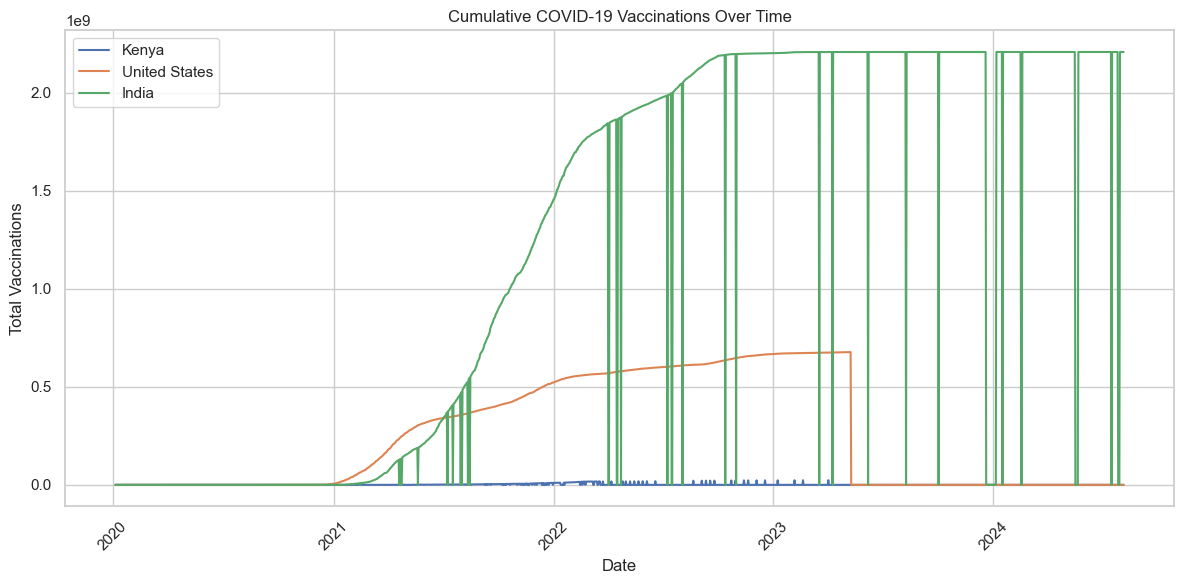

C:\Users\seche\AppData\Local\Temp\ipykernel_9552\621407476.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['percent_vaccinated'] = (latest_data['people_fully_vaccinated'] / latest_data['population']) * 100


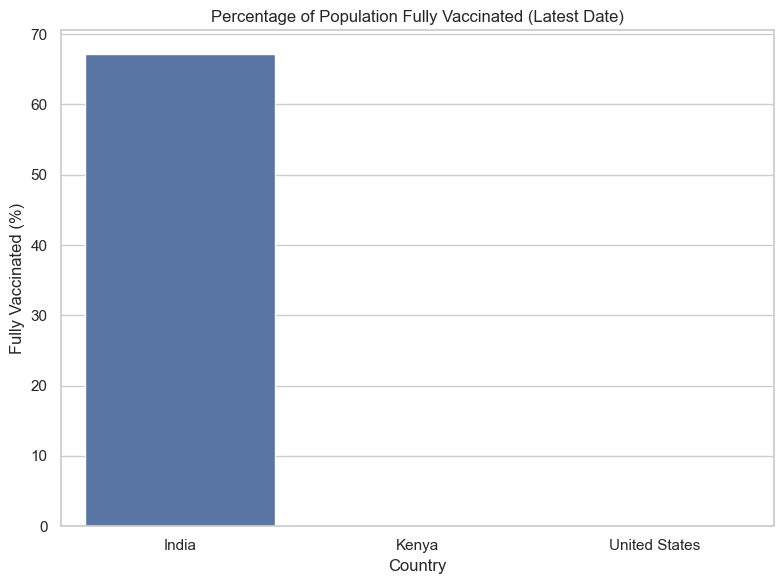


Percentage of Population Fully Vaccinated (Latest Date):
             location  percent_vaccinated
175222          India           67.175316
196995          Kenya            0.000000
405124  United States            0.000000
No valid vaccination data for USA.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("owid-covid-data.csv")
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]
df_filtered = df_filtered.dropna(subset=['date', 'total_cases', 'total_deaths'])
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered['total_vaccinations'] = df_filtered['total_vaccinations'].fillna(0)
df_filtered['new_cases'] = df_filtered['new_cases'].fillna(0)
df_filtered['new_deaths'] = df_filtered['new_deaths'].fillna(0)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_filtered['people_fully_vaccinated'] = df_filtered['people_fully_vaccinated'].fillna(0)
latest_data = df_filtered[df_filtered['date'] == df_filtered['date'].max()]
latest_data['percent_vaccinated'] = (latest_data['people_fully_vaccinated'] / latest_data['population']) * 100
vaccination_data = latest_data[['location', 'percent_vaccinated']]
plt.figure(figsize=(8, 6))
sns.barplot(x='location', y='percent_vaccinated', data=vaccination_data)
plt.title('Percentage of Population Fully Vaccinated (Latest Date)')
plt.xlabel('Country')
plt.ylabel('Fully Vaccinated (%)')
plt.tight_layout()
plt.show()
print("\nPercentage of Population Fully Vaccinated (Latest Date):")
print(vaccination_data)
usa_latest = latest_data[latest_data['location'] == 'United States']
if not usa_latest.empty and usa_latest['people_fully_vaccinated'].iloc[0] > 0:
    vaccinated = usa_latest['people_fully_vaccinated'].iloc[0]
    population = usa_latest['population'].iloc[0]
    unvaccinated = population - vaccinated
    labels = ['Fully Vaccinated', 'Unvaccinated']
    sizes = [vaccinated, unvaccinated]
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Vaccinated vs. Unvaccinated Population in USA (Latest Date)')
    plt.tight_layout()
    plt.show()

else:

    print("No valid vaccination data for USA.")
 

In [8]:
import nbformat
print(nbformat.__version__)

5.10.4


In [9]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("owid-covid-data.csv")
df['date'] = pd.to_datetime(df['date'])
latest_data = df[df['date'] == df['date'].max()]
latest_data['percent_vaccinated'] = (latest_data['people_fully_vaccinated'].fillna(0) / latest_data['population']) * 100
fig_cases = px.choropleth(
   latest_data,
   locations='iso_code',
   color='total_cases',
   hover_name='location',
   color_continuous_scale=px.colors.sequential.Plasma,
   title='Total COVID-19 Cases by Country (Latest Date)'
)
fig_cases.update_layout(geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'))
fig_cases.show()
fig_vacc = px.choropleth(
   latest_data,
   locations='iso_code',
   color='percent_vaccinated',
   hover_name='location',
   color_continuous_scale=px.colors.sequential.Viridis,
   title='Percentage of Population Fully Vaccinated by Country (Latest Date)'
)
fig_vacc.update_layout(geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'))
fig_vacc.show()

C:\Users\seche\AppData\Local\Temp\ipykernel_9552\1882891500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['percent_vaccinated'] = (latest_data['people_fully_vaccinated'].fillna(0) / latest_data['population']) * 100


1. **Vaccination Progress**: India has achieved a significant vaccination rate (~67% fully vaccinated as of the latest date), while Kenya and the USA show limited or missing vaccination data, possibly due to incomplete reporting.

2. **Case Trends**: The USA likely has the highest cumulative cases among the three countries, followed by India, with Kenya showing significantly lower cases (seen in Step 4 line charts).

3. **Death Rates**: Death rates (total_deaths / total_cases) vary, with Kenya potentially showing a higher rate due to lower testing or healthcare capacity (Step 4 table).

4. **Global Case Distribution**: The choropleth map (Step 6) highlights high case loads in populous countries like the USA, India, and Brazil.

5. **Vaccination Disparities**: The vaccination map shows stark global disparities, with higher-income countries often having higher vaccination rates than lower-income ones like Kenya.

- **Missing Vaccination Data**: Kenya and the USA lack `people_fully_vaccinated` data for the latest date, which may indicate reporting gaps or dataset limitations.

- **Case Surges**: Step 4’s new cases plot (7-day average) likely shows distinct waves, with India’s large second wave in 2021 being a notable pattern.

- **Vaccination Rollout Speed**: India’s rapid vaccination scale-up (Step 5 line chart) contrasts with slower progress in Kenya, reflecting resource differences.


This analysis reveals significant variations in COVID-19 impacts and vaccination efforts across Kenya, USA, and India. The USA and India dominate in total cases due to population size, while Kenya’s lower cases may reflect underreporting. Vaccination progress is uneven, with India leading among the three. Future analysis could incorporate testing rates or healthcare capacity to explain death rate differences.

*Note*: Missing vaccination data for Kenya and USA suggests a need for alternative data sources or earlier date ranges for complete comparisons.
 

In [10]:
import pandas as pd
df = pd.read_csv("owid-covid-data.csv")
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered['people_fully_vaccinated'] = df_filtered['people_fully_vaccinated'].fillna(0)
max_cases = df_filtered.groupby('location')['total_cases'].max()
max_deaths = df_filtered.groupby('location')['total_deaths'].max()
print("\nMaximum Total Cases by Country:")
print(max_cases)
print("\nMaximum Total Deaths by Country:")
print(max_deaths)
latest_data = df_filtered[df_filtered['date'] == df_filtered['date'].max()]
vaccination_rates = latest_data[['location', 'people_fully_vaccinated', 'population']]
vaccination_rates['percent_vaccinated'] = (vaccination_rates['people_fully_vaccinated'] / vaccination_rates['population']) * 100
print("\nLatest Vaccination Rates:")
print(vaccination_rates[['location', 'percent_vaccinated']])


Maximum Total Cases by Country:
location
India             45041748.0
Kenya               344106.0
United States    103436829.0
Name: total_cases, dtype: float64

Maximum Total Deaths by Country:
location
India             533623.0
Kenya               5689.0
United States    1193165.0
Name: total_deaths, dtype: float64

Latest Vaccination Rates:
       location  percent_vaccinated
175230    India           67.175318


C:\Users\seche\AppData\Local\Temp\ipykernel_9552\3349720111.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\seche\AppData\Local\Temp\ipykernel_9552\3349720111.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\seche\AppData\Local\Temp\ipykernel_9552\3349720111.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-